# The 8-Puzzle 

 The 8-Puzzle
 8-Puzzle is a game invented by Noyes Palmer Chapman in the 1870's. This  problem consist in a 3x3 grid with 8 labeled tiles (one to eight) and one blank (empty tile). The goal is to rearrange the tiles until they are oredered. Labeled tiles can be swaped with the blank in left, right, up and dwon direction (when they are adjacent).
 
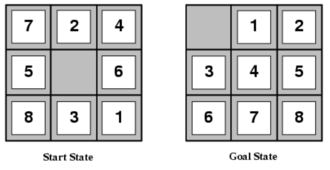

- System's state is give by tiles positions
- The succesor function moves the blank (left, right, up and dwon)
- Goal is reached when the tiles are ordered.
- Unitary cost (one per move)

In order to deifned a blind serach we should import **SimpleSearch** and write succesor and goal functions. Succesor function recieves a node and returns a succesors list.

The abstrac representation for the state is defined using tuples (we wish that a node state be inmutable). For example, the states for the configurations in the previous figure can be defined as follows (0 value is used  for the blank). 

In [5]:
state1=((7,2,4),(5,0,6),(8,3,1)) # initial state
state2=((0,1,2),(3,4,5),(6,7,8)) # final state

 Previous examples should be assigned as part of a node. A *SimpleSearch node* has the following attributes:

  - state: the system state at this node
  - parent: node which generated it (default "None"). 
  - depth: node's tree depth (default 0).
  - cost: node's cost (e.i. one per move, default 0).
  - delta: node's heuristic value (default 0).
  - op: String containing generator operation description (default "")


to start we add SimpleSearch

In [ ]:
import sys,os
baile_path=os.path.abspath(os.path.join("..","src"))
if not baile_path in sys.path:
    sys.path.append(baile_path)
import SimpleSearch as ss
from imp import reload
reload(ss)

ModuleNotFoundError: No module named 'imp'

a node is defined as follow:

In [ ]:
start=ss.node(((7,2,4),(5,0,6),(8,3,1)),op="start") # only node state is given

In [ ]:
# to print some node's attributes
print("start's state: ", start.state) 
print("start's parent: ", start.parent) 
print("start's depth: ", start.depth) 

start's state:  ((7, 2, 4), (5, 0, 6), (8, 3, 1))
start's parent:  None
start's depth:  0


In order to generated a node's succesors we should move the blank (0). For example if the 0 is at position $(i,j)$, it can be move to: 

- move right: swap with tile at $(i+1,j)$,
- move left: swap with tile at $(i-1,j)$,
- move down: swap with tile at $(i,j+1)$ and
- move up: swap with tile at $(i,j-1)$

this give at most four possible succesors. Note that a movement is valid only if $0\leq i,j < 3$. A possible succesor implementation is as follows:

In [ ]:
def successor8Puzzle(a):
    board=a.state # current state
    #find the 0
    i,j=[(i,j) for i in range(len(board)) for j in range(len(board[i])) if board[i][j]==0][0]
    # postions
    left,right=(i,j-1,"left"),(i,j+1,"right")
    up,down=(i+1,j,"down"),(i-1,j,"up")
    successors=[]
    for x,y,op in [up,down,left,right]: 
        if  0<=y<len(board[0]) and 0<=x<len(board): # test for boundaries
            nboard=[list(bx[:]) for bx in board] # make a copy
            nboard[x][y],nboard[i][j]=board[i][j],board[x][y] # swap 
            nboard=tuple([tuple(row) for row in nboard]) # make inmutable
            successors.append(ss.node(nboard,op=op,depth=a.depth+1,parent=a))# create a node
    return successors # list of successors

using just define fucntion (it recieves a node).

In [ ]:
successor8Puzzle(start)

to print  state value and the generator operation

In [ ]:
[(x.state,x.op) for x in successor8Puzzle(start)]

[(((7, 2, 4), (5, 3, 6), (8, 0, 1)), 'down'),
 (((7, 0, 4), (5, 2, 6), (8, 3, 1)), 'up'),
 (((7, 2, 4), (0, 5, 6), (8, 3, 1)), 'left'),
 (((7, 2, 4), (5, 6, 0), (8, 3, 1)), 'right')]

for this problem the goal is defined explicitly, as consequence the goal function recieves two nodes(start and goal). Whe the goal is given implicitly the goal fucntion recieves only one argument (you can use a *var).

In [ ]:
 
def goal8Puzzle(*states):  # goal8Puzzle(start,final)
    a=states[0] # start state is the firts argument
    b=states[1] # final state is the second...
    return a.state==b.state # test if a==b (returns a boolean)

if final is:

In [ ]:
final=ss.node(((0,1,2),(3,4,5),(6,7,8)),op="final")

to test the goal function:

In [ ]:
print(goal8Puzzle(start,final)) # start=final
print(goal8Puzzle(final,final)) # final=final


False
True


now, all is ready to execute (**bfs**) and (**dfs**) searchs. We could create a instance of each one as follow:

In [ ]:
bfs=ss.BlindSearch(start,successor8Puzzle,goal8Puzzle,goal_state=final,strategy="bfs")
dfs=ss.BlindSearch(start,successor8Puzzle,goal8Puzzle,goal_state=final,strategy="dfs")

to perform a search we execute **find**. As results a node with a valid state is returned it the solution exist, and with **No solution found** it  solution does not exist.

In [ ]:
resb=bfs.find() # Performs a BFS

finished in 172604 iterations


to see the final state:

In [ ]:
print(resb.state)

((0, 1, 2), (3, 4, 5), (6, 7, 8))


for this case we can track states transictions by using node's **getPath** method.

In [ ]:
seqb=resb.getPath()

In [ ]:
print("Solution sequence has  %s steps" %len(seqb))

Solution sequence has  27 steps


In [ ]:
seqb # Solution

[(((7, 2, 4), (5, 0, 6), (8, 3, 1)), 'start', 0),
 (((7, 2, 4), (0, 5, 6), (8, 3, 1)), 'left', 1),
 (((0, 2, 4), (7, 5, 6), (8, 3, 1)), 'up', 2),
 (((2, 0, 4), (7, 5, 6), (8, 3, 1)), 'right', 3),
 (((2, 5, 4), (7, 0, 6), (8, 3, 1)), 'down', 4),
 (((2, 5, 4), (7, 3, 6), (8, 0, 1)), 'down', 5),
 (((2, 5, 4), (7, 3, 6), (0, 8, 1)), 'left', 6),
 (((2, 5, 4), (0, 3, 6), (7, 8, 1)), 'up', 7),
 (((2, 5, 4), (3, 0, 6), (7, 8, 1)), 'right', 8),
 (((2, 5, 4), (3, 6, 0), (7, 8, 1)), 'right', 9),
 (((2, 5, 0), (3, 6, 4), (7, 8, 1)), 'up', 10),
 (((2, 0, 5), (3, 6, 4), (7, 8, 1)), 'left', 11),
 (((0, 2, 5), (3, 6, 4), (7, 8, 1)), 'left', 12),
 (((3, 2, 5), (0, 6, 4), (7, 8, 1)), 'down', 13),
 (((3, 2, 5), (6, 0, 4), (7, 8, 1)), 'right', 14),
 (((3, 2, 5), (6, 4, 0), (7, 8, 1)), 'right', 15),
 (((3, 2, 5), (6, 4, 1), (7, 8, 0)), 'down', 16),
 (((3, 2, 5), (6, 4, 1), (7, 0, 8)), 'left', 17),
 (((3, 2, 5), (6, 0, 1), (7, 4, 8)), 'up', 18),
 (((3, 2, 5), (6, 1, 0), (7, 4, 8)), 'right', 19),
 (((3, 2, 0

In [ ]:
resd=dfs.find() # Performs a DFS

finished in 11766 iterations


In [ ]:
seqd=resd.getPath()

In [ ]:
print("Solution sequence has  %s steps" %len(seqd))

Solution sequence has  11451 steps


To long sequence, it is better no to show...

to perform $A^*$ search we first need to defined an heuristic. For 8 puzzle we can use the sum of **manhattan** distance for each tile from current to final position.  

In [ ]:
def manhattan(*states):
    cs,gs=states[0].state,states[1].state
    cs_pos=[(cs[i][j],(i,j)) for i in range(len(cs)) for j in range(len(cs[0]))]
    gs_pos=[(gs[i][j],(i,j)) for i in range(len(gs)) for j in range(len(gs[0]))]
    cs_pos.sort(),gs_pos.sort()
    #print(cs_pos)
    #print(ns_pos)
    res=[abs(a[1][0]-b[1][0])+abs(a[1][1]-b[1][1]) for a,b in zip(cs_pos[1:],gs_pos[1:])] 
    #print(sum(res))
    return sum(res)

In [ ]:
manhattan(start,final)

18

In [ ]:
reload(ss)
ass=ss.BlindSearch(start,successor8Puzzle,goal8Puzzle,goal_state=final,
                     strategy="a*",heuristic=manhattan)

In [ ]:
resa=ass.find()

finished in 247 iterations


In [ ]:
seqa=resa.getPath()

In [ ]:
print("Solution sequence has  %s steps" %len(seqa))

Solution sequence has  67 steps


In [ ]:
seqa

[(((7, 2, 4), (5, 0, 6), (8, 3, 1)), 'start', 0),
 (((7, 2, 4), (5, 3, 6), (8, 0, 1)), 'down', 1),
 (((7, 2, 4), (5, 3, 6), (8, 1, 0)), 'right', 2),
 (((7, 2, 4), (5, 3, 0), (8, 1, 6)), 'up', 3),
 (((7, 2, 0), (5, 3, 4), (8, 1, 6)), 'up', 4),
 (((7, 0, 2), (5, 3, 4), (8, 1, 6)), 'left', 5),
 (((0, 7, 2), (5, 3, 4), (8, 1, 6)), 'left', 6),
 (((5, 7, 2), (0, 3, 4), (8, 1, 6)), 'down', 7),
 (((5, 7, 2), (3, 0, 4), (8, 1, 6)), 'right', 8),
 (((5, 7, 2), (3, 1, 4), (8, 0, 6)), 'down', 9),
 (((5, 7, 2), (3, 1, 4), (0, 8, 6)), 'left', 10),
 (((5, 7, 2), (0, 1, 4), (3, 8, 6)), 'up', 11),
 (((0, 7, 2), (5, 1, 4), (3, 8, 6)), 'up', 12),
 (((7, 0, 2), (5, 1, 4), (3, 8, 6)), 'right', 13),
 (((7, 1, 2), (5, 0, 4), (3, 8, 6)), 'down', 14),
 (((7, 1, 2), (0, 5, 4), (3, 8, 6)), 'left', 15),
 (((7, 1, 2), (3, 5, 4), (0, 8, 6)), 'down', 16),
 (((7, 1, 2), (3, 5, 4), (8, 0, 6)), 'right', 17),
 (((7, 1, 2), (3, 5, 4), (8, 6, 0)), 'right', 18),
 (((7, 1, 2), (3, 5, 0), (8, 6, 4)), 'up', 19),
 (((7, 1, 2), 

execution time can be measure using **%time**

In [ ]:
%time bfs.find() # execution time of BFS

finished in 172604 iterations
CPU times: user 8.06 s, sys: 108 ms, total: 8.17 s
Wall time: 8.41 s


In [ ]:
%time dfs.find() # execution time of DFS

finished in 11766 iterations
CPU times: user 440 ms, sys: 6.65 ms, total: 447 ms
Wall time: 444 ms


In [ ]:
%time ass.find() # execution time of DFS

finished in 247 iterations
CPU times: user 15 ms, sys: 711 µs, total: 15.7 ms
Wall time: 15.2 ms


## Exercise 
completed the table using the following input:

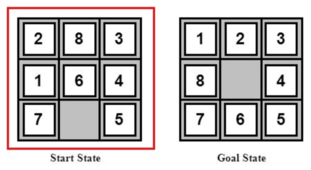

|Search strategy|# of visited nodes|execution time|solution length|
|:-------------:|--------------:|-------------:|--------------:|
|BFS|-|-|-|
|DFS|-|-|-|
|$A^*$|-|-|-|

- ¿What can be infered from the table?
- ¿Is it fair comparing the algorithms by using a single case?
    - If your answer is "no" ¿How is possible to perform a fair comparison?
    - If your answer is "Yes" Please, explain why.
